## Content

- UMAP
    - Internals
    - Hyperarams
    - Fail cases
    - Code walkthrough

## UMAP

- stands for Uniform Manifold Approximation and Projection


**What makes it different?**
- along with the local stucture, it also tries to capture global structure as well.

Let's try to see that using a visualization

link: https://pair-code.github.io/understanding-umap/


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/717/original/tsne24.gif?1714669569' width = "800"></center>









Notice how
- 3D structure is being preserved in 2D as well
- along with that all the same color points are together
    - ie. it is preserving local structure as well.

### Comparing UMAP with tSNE

Let's try to compare the results of Umap with tsne and see which ones fare better.

For this, we'll be using 784 dim MNIST fasion dataset
- which is a 10 class dataset
- consisting of images of tshirt, shirt, bag, shoes etc

The dimensions are being reduced from 784 to 3.


Let's compare the results

link: https://pair-code.github.io/understanding-umap/


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/721/original/tsne26.gif?1714671780' width = "800"></center>











Observation:

- Both UMAP and tsne have grouped similar categories together
- However, UMAP results have separated the categories much more clearly. (observe the Cyan group - sandals)
    - i.e. there is clear separation in the groups


Morover, it took UMAP approx 4 min as compared to 27 mins of tSNE.

We can conclude that
- so far UMAP has been faring better than tSNE in both performance and run time.

**But, how is it producing results so fast ?**

Let's try to understand what goes inside it.

However, we won't dive into its mathematics as it is fairly complex and out of scope.



### Internal working of UMAP - Intuition

Say, we have the following 2D data


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/739/original/tsne26.png?1714709739' width = "600"></center>













UMAP will try to build a weighted graph using datapoints as nodes
- and have sort of probablistic distance among them.
- where weights represents the likelihood of a connect.

The graph may look as follows:


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/740/original/tsne27.png?1714710013' width = "600"></center>















After reducing the dim to 1D,
- it'll tries create the same graph in lower dimension as well

such that
- Graph(Higher dim) ~ Graph(Lower dimension)


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/741/original/tsne28.png?1714710492' width = "800"></center>










If UMAP is able to build similar graph in lower dim
- it means it is able to proportionaltely preserve the distance between the nodes/ datapoints.

This technique is called "fuzzy simplical complex"

#### How does UMAP make connections  ?

It does so by creating a circle with a specified radius along each datapoint.
- If the radius of datapoints overlaps, it'll connect those points.

As the radius grows, the likelihood of connection decreases.
- Hence, the graph gets "fuzzy"

Here,
- n_nearest tells us how many nearest neighbour do you want to consider.


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/743/original/tsne29.gif?1714712611' width = "800"></center>












## Hyperparam of UMAP

There are two major parameters when it comes to configure UMAP
1. n_neighbors
2. min_dist

Let's see how these parameters affect the results of UMAP

### **n_neighbors**



Consider a projection of a 3D woolly mammoth in the left, and its 2D UMAP projection with some value of n_neighbors on the right.



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/746/original/tsne32.png?1714713140' width=800></center>



Now, if we increase the value of n_neighbor to very high value, lets say $200$, the 2D UMAP projection will look something like this



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/745/original/tsne31.png?1714713095' width=800></center>



Now, if we decrease the value of n_neighbor to a very small value, lets say $3$, the 2D UMAP projection will look something like this



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/744/original/tsne30.png?1714713033' width=800></center>



#### Que: What can we derive from this?


- If we keep increasing n_neighbors, UMAP will preseve global structures very well

- If we keep decreasing n_neighbors, 2D UMAP does not make any sense as it does not efficiently preserve global structures

### min_dist



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/749/original/tsne33.png?1714713905' width=800></center>




**min_dist** is the the **minimum distance allowed to be the seperation between close points in the lower dimension embedding**

- We typically want to preserve the close distance between points from $d$-dimension space to the $d^\prime$-dimension space

- If we increase min_dist, the shape of 2D projection of UMAP will scatter more

- So, min-distance configures the distance that we can give between two points when projection is made

### UMAP vs tSNE


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/750/original/tsne34.png?1714714107' width=800></center>





When comparing the results of tSNE and UMAP on same dataset, we see that, for same number of neighbours:
- tSNE isn't performing well in preserving global structures
- and the time takes by tSNE is 12x of UMAP




<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/751/original/tsne35.png?1714714240' width=800></center>







As we increase the perplexity to 2000
- tSNE structure starts to make sense

However, the time takes is 2h which is 40x the time taken by UMAP.

So far, UMAP has been outperforming tSNE

**Can you think of case where UMAP will fail?**

## Failcase of UMAP

If there is a case where
- there is sparse cluster outside and dense cluster inside

UMAP will fail in separating them in lower dim.


However, tSNE is able to do the job fine.


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/752/original/tsne36.png?1714714484' width=800></center>









## Code walkthrough - UMAP - MNIST

### Loading data

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
from sklearn import datasets

digits = datasets.load_digits()

X=digits.data
print(X.shape)

(1797, 64)


### Visualizing data

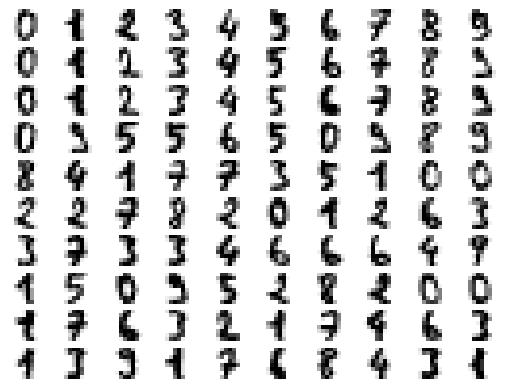

In [ ]:
import matplotlib.pyplot as plt

plt.set_cmap('binary') # set the colourmap to grayscale white to black

for i in range(10):
  for j in range(10):
   ax = plt.subplot(10,10,1+10*i+j)
   ax.axis('off')
   ax.matshow(digits.images[10*i+j])

plt.show()
plt.close()

#### How many dim do we have ?

Each image has 10 rows and 10 columns
- we have total of 100 pixels i.e. 100 dimension

We'll be reducing these 100 dim to 2 dims

### Data scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

X_stand = scaler.transform(X)

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 864.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.4 MB/s eta 0:00:00


### Fitting data using UMAP

In [ ]:
import umap
X_embedded = umap.UMAP().fit_transform(X)

print(X_embedded.shape)

(1797, 2)


<Figure size 640x480 with 0 Axes>

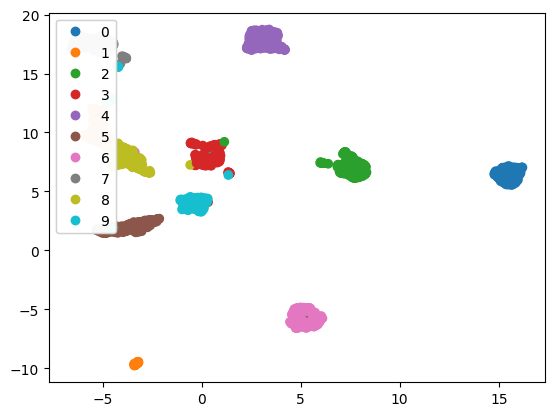

In [ ]:
plt.set_cmap('tab10')

fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:,0],X_embedded[:,1],c=digits.target)

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()
plt.close()

Notice that
- how the clusters are well separated as compared to tSNE
- amount of time taken by UMAP to fit data is considerably less

## Things to consider when using UMAP

There are some major adv of UMAP.

But, again **with great advantages, comes disadvantages too!**

1. Hyperparameters in UMAP really matters
  - It is not easy to find optimal hyperparameters and one often has to to many trials to find one.

2. Clusters sizes are not important
  - Imagine two clusters; one being very large and other being comparitively small
  - After fitting UMAP, it is not guaranteed that the sizes of the clusters will be preserved.

3. Distances between clusters are not important
  - Consider three clusters where $C_{1}$ and $C_{2}$ are close, and $C_{3}$ is a little far away from both the clusters

  - After fitting UMAP, it is not guaranteed that these distances between the clusters will be preserved

4. Random Noise doesn't always look random
  - After fitting UMAP on some random distribution of data, you may be able to find clusters(patterns), which says that the ouput from UMAP is not guaranteed to be random too

5. May need to plot more than one plot
  - This means that, every time one fits an UMAP model with same hyperparameters, same results are not guaranteed

## Post Read




- t-SNE interactive blog: <a href="https://distill.pub/2016/misread-tsne/"> t-SNE blog </a>

- t-SNE original paper: <a href="https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf"> by Laurens van der Maaten and Geoffrey Hinton </a>

- You can play around these parameters and read more about UMAP here: <a href="https://pair-code.github.io/understanding-umap/"> UMAP blog </a>